In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from datetime import timedelta

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
data = pd.read_csv('dataset/weather-sa-2017-2019-clean.csv')
data.shape

(249023, 15)

In [3]:
data = data.replace(" ", np.nan).replace("N/A", np.nan ).replace("NA", np.nan).replace("", np.nan)
#data['humidity'] = data['humidity'].str_replace('%','')
data['humidity'] = data['humidity'].str.replace('%',' ').astype('float')

In [4]:
delete_col =['Unnamed: 0','time', 'date' ]
data.drop(delete_col, axis =1 , inplace =True)

In [5]:
# now filling the missing values with means for each city
data['humidity'] = data['humidity'].fillna(data.groupby('city')['humidity'].transform('mean'))
data['barometer'] = data['barometer'].fillna(data.groupby('city')['barometer'].transform('mean'))

### Target

In [6]:
import re
data['rain'] = data['weather'].str.contains('rain|shower|sprinkle|thunderstorm', case = False ,regex=True)

In [7]:
data.drop('weather', axis =1 , inplace =True)

In [8]:
c = pd.get_dummies(data['city'], drop_first=True)

In [9]:
data = pd.concat([c,data], axis=1 )

In [10]:
data.drop('city' , axis =1 , inplace= True)

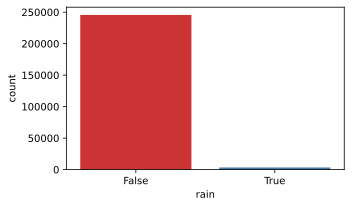

In [11]:
f, ax = plt.subplots(figsize=(5, 3))
ax = sns.countplot(x="rain", data=data, palette="Set1")
plt.show()

In [12]:
X = data.drop(['rain'], axis=1)
y = data['rain']

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
#sample = rus.sample(sample,sample('rain'))
#X_resampled, y_resampled = rus.sample(sample, sample[['rain']])
X_resampled, y_resampled = rus.fit_resample(X, y)

In [14]:
resampled =pd.concat([X_resampled,y_resampled], axis =1)

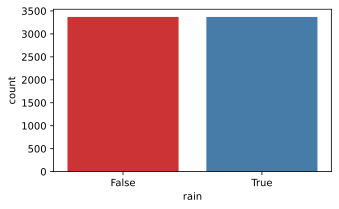

In [15]:
f, ax = plt.subplots(figsize=(5, 3))
ax = sns.countplot(x="rain", data=resampled, palette="Set1")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled[['humidity','temp']], y_resampled, test_size = 0.20, random_state = 42)

In [45]:
X_train.shape, X_test.shape

((5390, 2), (1348, 2))

In [54]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
#lg = LogisticRegression(C=10)
lg = LogisticRegression(solver= 'liblinear', C=100)

# fit the model
lg.fit(X_train, y_train)

LogisticRegression(C=100, solver='liblinear')

In [55]:
lg.predict(X_train)

array([False, False, False, ...,  True, False, False])

In [56]:
y_pred_test = lg.predict(X_test)

In [57]:
lg.score(X_train, y_train)

0.723191094619666

In [58]:
lg.score(X_test, y_test)

0.7188427299703264

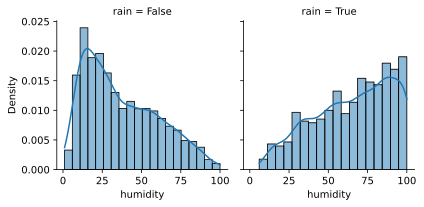

In [51]:

g = sns.FacetGrid(resampled, col='rain', sharex=True, sharey=True)
g.map(sns.histplot, 'humidity',stat='density', kde=True);
#g.set_title('The relationship between the temperature and pressure');

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.72      0.76      0.74       704
        True       0.72      0.67      0.70       644

    accuracy                           0.72      1348
   macro avg       0.72      0.72      0.72      1348
weighted avg       0.72      0.72      0.72      1348



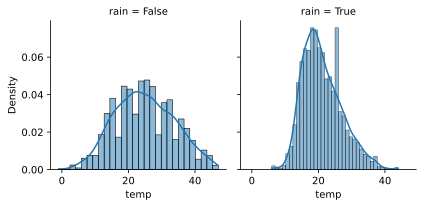

In [53]:
g = sns.FacetGrid(resampled, col='rain', sharex=True, sharey=True)
g.map(sns.histplot, 'temp',stat='density', kde=True);
#g.set_title('The relationship between the temperature and pressure');